In [175]:
import tensorflow.keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D,LSTM,Dense,Bidirectional, TimeDistributed,Conv1D,Flatten,MaxPool1D
import numpy as np



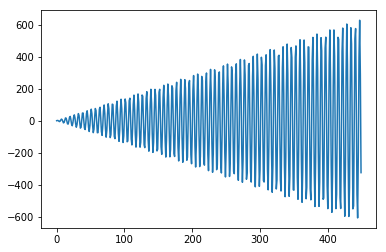

In [488]:
n_steps = 25
n_features=1

def split_seq(data, n_steps=3):
    x,y = [],[]
    
    for i in range(len(data)):
        if(i+n_steps >= len(data)):
            break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    
    return x,y
def gen_data(n_samples, func):
    return np.array([func(i) for i in range(n_samples)])
        
            
    
f = lambda x: x**2
n_samples=450
data = gen_data(n_samples,f)
x = len(data)
from matplotlib import pyplot as plt
plt.plot(data)
plt.show()
trainx, trainy = split_seq(data, n_steps)
# print(data)

In [489]:
print(len(trainx))

425


In [490]:
x=(np.asarray(trainx))

x = x.reshape((x.shape[0],x.shape[1],n_features))
print(x.shape)

(425, 25, 1)


In [491]:
y = np.array(trainy)
print(y.shape)

(425,)


In [492]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [493]:
model.fit(x, y, epochs=100, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 3s 281ms/step - loss: 47556.0469 - val_loss: 166231.9219
Epoch 2/100
11/11 [==============================] - 2s 213ms/step - loss: 47214.6367 - val_loss: 165309.6406
Epoch 3/100
11/11 [==============================] - 2s 191ms/step - loss: 46959.2578 - val_loss: 163416.3281
Epoch 4/100
11/11 [==============================] - 2s 220ms/step - loss: 46717.2148 - val_loss: 163258.2656
Epoch 5/100
11/11 [==============================] - 3s 242ms/step - loss: 46345.7578 - val_loss: 162686.5938
Epoch 6/100
11/11 [==============================] - 3s 236ms/step - loss: 46239.4688 - val_loss: 161114.5156
Epoch 7/100
11/11 [==============================] - 3s 263ms/step - loss: 45600.0000 - val_loss: 163118.8438
Epoch 8/100
11/11 [==============================] - 2s 216ms/step - loss: 46888.4180 - val_loss: 160369.7812
Epoch 9/100
11/11 [==============================] - 3s 298ms/step - loss: 46544.3438 - val_loss: 158009.4062
Epoch 10/1

In [13]:
test = np.array([f(i) for i in range(10)])
test = test.reshape(1, test.shape[0],n_features)
print(test.shape)

(1, 10, 1)


In [60]:
LSTM?

In [482]:
def test(start):
    test = np.array([f(i) for i in range(start,start+n_steps,1)])
    test = test.reshape(1, test.shape[0],n_features)
#     print(test.shape)
    pred = model.predict(test)
    actual = f(start+n_steps)
    
    diff=np.round(abs((pred[0][0]-actual)/abs(actual)),3)
#     print(pred[0][0],actual,diff*100)
    return diff

def accuracy(n_samples, seed=1000):
    d = 0
    for i in range(n_samples):
        d+=test(np.random.randint(seed))
    print("Accuracy: {}".format((1-(d/(n_samples+1)))*100))

accuracy(1000)
# print(np.random.randint(10000))

Accuracy: [70.95574]


In [285]:
import numpy as np

def make_sequence(data,n_steps):
    x,y = [],[]
    for i in range(len(data)):
        if i+n_steps >= len(data):
            break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(x),np.array(y)

def gen_data(n_samples, mapping_func,n_steps):
    return make_sequence([mapping_func(i) for i in range(n_sample)],n_steps)

In [286]:
n_sequence=2
n_sample = 500
n_steps = 10 
n_features = 1
#data has 20 steps but we split each step into 2 subsequence to feed our CNN LSTM hybrid model

mapping_func = lambda x: x(np.sin(x)+np.cos(x))

x,y=gen_data(n_sample,mapping_func,n_steps*n_sequence)

TypeError: 'int' object is not callable

In [93]:
#[samples, sequences, timesteps, features]
print(x.shape)
xtrain=x.reshape((x.shape[0], n_sequence, n_steps))
print(xtrain.shape)

(480, 20)
(480, 2, 10)


In [94]:
xtrain=np.expand_dims(xtrain,axis=-1)
print(xtrain.shape)

(480, 2, 10, 1)


In [97]:
print(xtrain[0],y[0])

[[[  0]
  [ 10]
  [ 20]
  [ 30]
  [ 40]
  [ 50]
  [ 60]
  [ 70]
  [ 80]
  [ 90]]

 [[100]
  [110]
  [120]
  [130]
  [140]
  [150]
  [160]
  [170]
  [180]
  [190]]] 200


In [98]:
#Model with CNN + LSTM hybrid model input [n_samples,n_sequence,n_steps,n_features]

model = Sequential()
model.add(TimeDistributed(Conv1D(64,1,activation='relu'), input_shape=(None,n_steps,n_features)))
model.add(TimeDistributed(MaxPool1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_3 (TimeDist (None, None, 9, 64)       192       
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 4, 64)       0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 256)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                61400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 61,643
Trainable params: 61,643
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.fit(xtrain,y,epochs=300,validation_split=0.15)

Epoch 1/300
13/13 [==============================] - 0s 28ms/step - loss: 1581.8040 - val_loss: 1772.2614
Epoch 2/300
13/13 [==============================] - 0s 18ms/step - loss: 1532.2297 - val_loss: 3349.7632
Epoch 3/300
13/13 [==============================] - 0s 23ms/step - loss: 1528.6515 - val_loss: 2443.4583
Epoch 4/300
13/13 [==============================] - 0s 23ms/step - loss: 1534.7565 - val_loss: 1990.1931
Epoch 5/300
13/13 [==============================] - 0s 24ms/step - loss: 1528.7098 - val_loss: 1261.3478
Epoch 6/300
13/13 [==============================] - 0s 23ms/step - loss: 1560.6578 - val_loss: 3940.1333
Epoch 7/300
13/13 [==============================] - 0s 20ms/step - loss: 1536.9875 - val_loss: 2106.9231
Epoch 8/300
13/13 [==============================] - 0s 23ms/step - loss: 1517.5822 - val_loss: 1379.1313
Epoch 9/300
13/13 [==============================] - 0s 20ms/step - loss: 1495.3792 - val_loss: 2126.5957
Epoch 10/300
13/13 [==========================

13/13 [==============================] - 0s 23ms/step - loss: 5952.8252 - val_loss: 3454.6724
Epoch 154/300
13/13 [==============================] - 0s 23ms/step - loss: 1544.5752 - val_loss: 4392.3096
Epoch 155/300
13/13 [==============================] - 0s 22ms/step - loss: 1079.1851 - val_loss: 3642.2388
Epoch 156/300
13/13 [==============================] - 0s 24ms/step - loss: 660.8447 - val_loss: 653.4115
Epoch 157/300
13/13 [==============================] - 0s 23ms/step - loss: 641.6503 - val_loss: 1081.2368
Epoch 158/300
13/13 [==============================] - 0s 23ms/step - loss: 606.3554 - val_loss: 1440.6744
Epoch 159/300
13/13 [==============================] - 0s 22ms/step - loss: 609.6617 - val_loss: 539.8365
Epoch 160/300
13/13 [==============================] - 0s 23ms/step - loss: 606.5132 - val_loss: 1193.2168
Epoch 161/300
13/13 [==============================] - 0s 22ms/step - loss: 586.6519 - val_loss: 788.6086
Epoch 162/300
13/13 [==============================

Epoch 230/300
13/13 [==============================] - 0s 30ms/step - loss: 642.0829 - val_loss: 1230.1533
Epoch 231/300
13/13 [==============================] - 0s 30ms/step - loss: 670.5190 - val_loss: 636.6381
Epoch 232/300
13/13 [==============================] - 0s 30ms/step - loss: 717.6232 - val_loss: 2586.4062
Epoch 233/300
13/13 [==============================] - 0s 31ms/step - loss: 728.6349 - val_loss: 100.7101
Epoch 234/300
13/13 [==============================] - 0s 30ms/step - loss: 682.4761 - val_loss: 1520.3944
Epoch 235/300
13/13 [==============================] - 0s 30ms/step - loss: 625.2713 - val_loss: 1249.5298
Epoch 236/300
13/13 [==============================] - 0s 31ms/step - loss: 614.1343 - val_loss: 1016.7546
Epoch 237/300
13/13 [==============================] - 0s 31ms/step - loss: 605.3406 - val_loss: 979.9644
Epoch 238/300
13/13 [==============================] - 0s 30ms/step - loss: 598.5602 - val_loss: 1131.3147
Epoch 239/300
13/13 [===================

In [177]:
def test(seed=1000,ns):
    start = np.random.randint(seed)
    testx = np.array([np.array([i*10 for i in range(start,start+(n_steps*n_sequence),1)]) for _ in range(ns)])
    actual = testx[:,-1]
    testx = testx.reshape((1,n_sequence,n_steps,n_features))
    pred = model(testx)
    actual = (start+(n_steps*n_sequence))*10
    return abs(pred[0][0].numpy()-actual)/actual

def accuray(ns):
    s = 0
    for i in range(ns):
        s+=test()
    print(1-s/100)
    
test()
    # accuray(10000)

0.011883974746919015

In [179]:
#Model with ConvLSTM2D input [n_samples,n_sequence,rows,columns,n_features]

fmodel = Sequential()
fmodel.add(ConvLSTM2D(filters=64,kernel_size=(1,2),activation='relu',input_shape=(n_sequence,1,n_steps, n_features)))
fmodel.add(Flatten())
fmodel.add(Dense(1))
fmodel.compile(optimizer='adam', loss='mse')
fmodel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 9, 64)          33536     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 577       
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________


In [180]:
shape = xtrain.shape
xtrain1=xtrain.reshape(shape[0],shape[1],1,shape[2],shape[3])
print(xtrain1.shape)

(480, 2, 1, 10, 1)


In [182]:
fmodel.fit(xtrain1,y,epochs=100,validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 1s 49ms/step - loss: 123.9355 - val_loss: 966.6169
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 144.5487 - val_loss: 988.9753
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 147.5407 - val_loss: 862.3262
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 128.2309 - val_loss: 1111.1146
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 95.3067 - val_loss: 1327.7113
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 134.0112 - val_loss: 511.3009
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 183.7360 - val_loss: 928.6046
Epoch 8/100
12/12 [==============================] - 0s 10ms/step - loss: 170.8697 - val_loss: 3261.2429
Epoch 9/100
12/12 [==============================] - 0s 10ms/step - loss: 199.0203 - val_loss: 1031.3666
Epoch 10/100
12/12 [==============================] - 0s 10ms

In [277]:
def acc(model,ns=1000):
    seed = 10000
    testx = np.array([(np.random.randint(100)*10)+np.array([i*10 for i in range(n_steps*n_sequence)]) for _ in range(ns)])
    actual = testx[:,-1]+10
    sh=np.array(model.inputs[0].get_shape().as_list())
    sh[sh==None]=-1
#     sh = testx.shape
#     ins = fmodel.inputs[0].get_shape()[1:]
    testx=testx.reshape(sh)
    print(testx.shape)
    prediction = model.predict(testx)
    acc=(1-np.mean(abs(prediction[:,0]-actual)/actual))*100
    print(acc)
    
acc(fmodel,100)
# sh=np.array(model.inputs[0].get_shape().as_list())

# print(sh)

(100, 2, 1, 10, 1)
98.41189679982091


In [3]:
import numpy as np
#mulitvariate data 
#Example of multivariate data
#[10, 20, 30, 40, 50, 60, 70, 80, 90]
#[15, 25, 35, 45, 55, 65, 75, 85, 95]
limit=1000
n_steps=10
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = in_seq1+in_seq2
in_seq1=in_seq1.reshape((len(in_seq1),1))
in_seq2=in_seq2.reshape((len(in_seq1),1))
out_seq=out_seq.reshape((len(out_seq),1))
dataset = np.hstack((in_seq1,in_seq2,out_seq))
print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


NameError: name 'dataset' is not defined